<a href="https://colab.research.google.com/github/RoadoneP/Machine_learning/blob/main/population%20in%20Korea/Population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#라이브러리

In [189]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 그래프에서 -(마이너스) 폰트 깨지는 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic


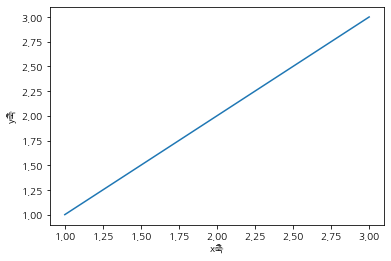

In [191]:
import matplotlib.pyplot as plt

# 한글로 x축, y축 이름 설정하여 그래프 그리기
plt.rc('font', family='NanumGothic')
plt.plot([1,2,3], [1,2,3])
plt.xlabel("x축")
plt.ylabel("y축")
plt.show()

In [192]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/age.csv',index_col=0)

In [193]:
df

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9857426,9857426,61253,70532,74322,72482,71688,78941,75386,75929,71772,76157,80577,74502,72380,80264,83081,83791,93326,108584,105344,112807,120957,125632,134735,143930,149420,159845,161550,150999,149562,150485,146573,148015,150838,149335,163855,173092,173138,169187,...,133804,141178,119297,105263,114400,80233,89224,89871,88753,90591,73185,64285,64933,63515,74898,60021,50860,49861,43160,38593,34377,31713,26206,21753,19206,15377,13515,12208,10165,8200,5892,4695,3589,3501,2569,1851,1436,1010,736,5519
서울특별시 종로구 (1111000000),154770,154770,652,794,911,895,859,1046,909,1012,919,1006,1089,1039,1008,1110,1167,1208,1374,1558,1541,1884,2149,2128,2287,2384,2576,2636,2672,2481,2304,2290,2188,2131,2147,2005,2191,2179,2332,2219,...,2175,2329,1939,1706,1862,1275,1465,1501,1465,1618,1279,1201,1206,1277,1489,1266,1094,1086,923,778,779,694,576,493,421,388,302,260,231,187,149,115,95,79,81,60,46,37,26,226
서울특별시 종로구 청운효자동(1111051500),13272,13272,81,82,90,105,97,116,117,116,102,119,144,123,108,135,126,139,138,172,171,164,161,193,168,159,169,171,179,154,151,191,147,178,190,168,168,197,243,216,...,147,161,126,127,137,82,113,118,107,127,111,104,98,106,121,99,91,104,83,74,76,58,55,51,30,30,13,24,18,12,12,14,7,7,8,3,5,1,1,17
서울특별시 종로구 사직동(1111053000),9441,9441,43,63,75,68,76,81,74,83,66,87,69,77,57,65,82,64,84,81,94,89,94,90,92,109,110,122,139,113,110,136,141,136,129,136,157,132,171,152,...,127,136,109,98,114,77,76,96,90,95,76,77,72,68,84,90,81,65,62,62,55,65,50,33,26,22,27,26,17,15,11,13,7,5,7,3,6,4,4,17
서울특별시 종로구 삼청동(1111054000),2907,2907,12,4,22,13,12,13,20,11,21,21,24,21,19,16,21,19,26,27,29,28,40,26,37,42,38,37,29,36,31,47,29,34,36,35,36,47,51,47,...,50,51,43,38,42,25,28,38,33,41,29,23,36,19,42,30,33,20,20,17,22,17,13,14,16,13,8,8,6,5,5,2,3,3,2,2,0,2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
제주특별자치도 서귀포시 서홍동(5013058000),10629,10629,91,111,131,106,140,139,160,170,156,164,169,144,133,126,127,129,131,147,149,118,138,147,143,137,134,140,123,84,100,101,91,108,100,106,148,160,207,173,...,106,116,107,81,110,79,74,90,99,69,79,50,73,58,76,60,48,53,39,36,31,30,21,24,27,14,17,8,18,2,2,4,1,2,4,4,1,0,3,1
제주특별자치도 서귀포시 대륜동(5013059000),13389,13389,146,148,155,159,145,147,132,145,124,132,138,126,93,114,115,117,122,144,162,142,148,126,162,136,138,153,135,129,157,146,158,155,180,204,200,255,215,209,...,203,201,184,116,138,105,139,126,123,135,97,120,107,80,91,98,70,63,74,49,53,57,49,51,31,15,22,13,13,15,7,5,2,14,8,4,4,5,3,2
제주특별자치도 서귀포시 대천동(5013060000),12993,12993,174,213,179,176,157,162,154,132,136,130,126,113,97,104,104,102,126,137,129,116,135,143,142,134,164,138,156,125,157,161,172,188,195,248,233,287,256,246,...,156,153,123,112,121,106,119,99,114,96,89,91,79,62,79,66,56,60,47,70,47,45,52,36,26,19,14,17,15,12,4,5,7,7,3,2,2,1,0,2


In [194]:
df= df.div(df['총인구수'],axis=0)
del df['총인구수'], df['연령구간인구수']
df

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,38세,39세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.006214,0.007155,0.007540,0.007353,0.007272,0.008008,0.007648,0.007703,0.007281,0.007726,0.008174,0.007558,0.007343,0.008142,0.008428,0.008500,0.009468,0.011015,0.010687,0.011444,0.012271,0.012745,0.013668,0.014601,0.015158,0.016216,0.016389,0.015318,0.015173,0.015266,0.014869,0.015016,0.015302,0.015149,0.016622,0.017560,0.017564,0.017163,0.016773,0.014184,...,0.013574,0.014322,0.012102,0.010679,0.011605,0.008139,0.009051,0.009117,0.009004,0.009190,0.007424,0.006521,0.006587,0.006443,0.007598,0.006089,0.005160,0.005058,0.004378,0.003915,0.003487,0.003217,0.002659,0.002207,0.001948,0.001560,0.001371,0.001238,0.001031,0.000832,0.000598,0.000476,0.000364,0.000355,0.000261,0.000188,0.000146,0.000102,0.000075,0.000560
서울특별시 종로구 (1111000000),0.004213,0.005130,0.005886,0.005783,0.005550,0.006758,0.005873,0.006539,0.005938,0.006500,0.007036,0.006713,0.006513,0.007172,0.007540,0.007805,0.008878,0.010067,0.009957,0.012173,0.013885,0.013749,0.014777,0.015404,0.016644,0.017032,0.017264,0.016030,0.014887,0.014796,0.014137,0.013769,0.013872,0.012955,0.014156,0.014079,0.015068,0.014337,0.014389,0.011721,...,0.014053,0.015048,0.012528,0.011023,0.012031,0.008238,0.009466,0.009698,0.009466,0.010454,0.008264,0.007760,0.007792,0.008251,0.009621,0.008180,0.007069,0.007017,0.005964,0.005027,0.005033,0.004484,0.003722,0.003185,0.002720,0.002507,0.001951,0.001680,0.001493,0.001208,0.000963,0.000743,0.000614,0.000510,0.000523,0.000388,0.000297,0.000239,0.000168,0.001460
서울특별시 종로구 청운효자동(1111051500),0.006103,0.006178,0.006781,0.007911,0.007309,0.008740,0.008816,0.008740,0.007685,0.008966,0.010850,0.009268,0.008137,0.010172,0.009494,0.010473,0.010398,0.012960,0.012884,0.012357,0.012131,0.014542,0.012658,0.011980,0.012734,0.012884,0.013487,0.011603,0.011377,0.014391,0.011076,0.013412,0.014316,0.012658,0.012658,0.014843,0.018309,0.016275,0.017480,0.014316,...,0.011076,0.012131,0.009494,0.009569,0.010322,0.006178,0.008514,0.008891,0.008062,0.009569,0.008363,0.007836,0.007384,0.007987,0.009117,0.007459,0.006857,0.007836,0.006254,0.005576,0.005726,0.004370,0.004144,0.003843,0.002260,0.002260,0.000980,0.001808,0.001356,0.000904,0.000904,0.001055,0.000527,0.000527,0.000603,0.000226,0.000377,0.000075,0.000075,0.001281
서울특별시 종로구 사직동(1111053000),0.004555,0.006673,0.007944,0.007203,0.008050,0.008580,0.007838,0.008791,0.006991,0.009215,0.007309,0.008156,0.006037,0.006885,0.008686,0.006779,0.008897,0.008580,0.009957,0.009427,0.009957,0.009533,0.009745,0.011545,0.011651,0.012922,0.014723,0.011969,0.011651,0.014405,0.014935,0.014405,0.013664,0.014405,0.016630,0.013982,0.018112,0.016100,0.014935,0.013346,...,0.013452,0.014405,0.011545,0.010380,0.012075,0.008156,0.008050,0.010168,0.009533,0.010062,0.008050,0.008156,0.007626,0.007203,0.008897,0.009533,0.008580,0.006885,0.006567,0.006567,0.005826,0.006885,0.005296,0.003495,0.002754,0.002330,0.002860,0.002754,0.001801,0.001589,0.001165,0.001377,0.000741,0.000530,0.000741,0.000318,0.000636,0.000424,0.000424,0.001801
서울특별시 종로구 삼청동(1111054000),0.004128,0.001376,0.007568,0.004472,0.004128,0.004472,0.006880,0.003784,0.007224,0.007224,0.008256,0.007224,0.006536,0.005504,0.007224,0.006536,0.008944,0.009288,0.009976,0.009632,0.013760,0.008944,0.012728,0.014448,0.013072,0.012728,0.009976,0.012384,0.010664,0.016168,0.009976,0.011696,0.012384,0.012040,0.012384,0.016168,0.017544,0.016168,0.017200,0.013760,...,0.017200,0.017544,0.014792,0.013072,0.014448,0.008600,0.009632,0.013072,0.011352,0.014104,0.009976,0.007912,0.012384,0.006536,0.014448,0.010320,0.011352,0.006880,0.006880,0.005848,0.007568,0.005848,0.004472,0.0048

# 문제 1

In [188]:
name = input('원하는 지역의 이름을 입력해주세요 : ') 
a = df.index.str.contains(name)
df2 = df[a]
df2

원하는 지역의 이름을 입력해주세요 : 방화


,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,38세,39세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 강서구 방화제1동(1150063000),0.008286,0.010141,0.011609,0.012170,0.012968,0.014716,0.013356,0.010832,0.010745,0.010875,0.011609,0.008847,0.009170,0.009343,0.008717,0.008847,0.008372,0.009214,0.009472,0.009947,0.010184,0.010918,0.012321,0.011997,0.013443,0.013831,0.013809,0.012126,0.012601,0.012946,0.012472,0.013162,0.014306,0.015190,0.016097,0.018298,0.019312,0.020671,0.019635,0.018103,...,0.011824,0.014263,0.012170,0.010249,0.010897,0.007703,0.009170,0.008264,0.008243,0.008739,0.006344,0.005157,0.005459,0.005265,0.005891,0.004488,0.004423,0.003905,0.003431,0.003042,0.002891,0.002374,0.001985,0.001877,0.001618,0.001424,0.001251,0.000993,0.001036,0.000820,0.000518,0.000367,0.000388,0.000367,0.000173,0.000151,0.000108,0.000043,0.000000,0.000367
서울특별시 강서구 방화제2동(1150064000),0.005717,0.006247,0.007064,0.007064,0.005308,0.006002,0.005839,0.005104,0.006452,0.007064,0.005880,0.005553,0.005186,0.006452,0.006819,0.006370,0.008330,0.008575,0.008861,0.009269,0.009677,0.012046,0.012332,0.014618,0.014700,0.017109,0.018252,0.017354,0.016252,0.019069,0.015435,0.016619,0.016578,0.014332,0.016946,0.017599,0.016497,0.015067,0.016456,0.012413,...,0.016660,0.017517,0.014741,0.013638,0.012781,0.008779,0.011229,0.010535,0.010739,0.010780,0.009106,0.008248,0.007881,0.006697,0.009432,0.008167,0.006533,0.006697,0.005186,0.005267,0.004247,0.005186,0.003593,0.002777,0.002409,0.001715,0.001960,0.001552,0.001062,0.000776,0.000776,0.000408,0.000490,0.000245,0.000286,0.000327,0.000082,0.000082,0.000082,0.000898
서울특별시 강서구 방화제3동(1150064100),0.006973,0.008042,0.007171,0.006101,0.007963,0.007289,0.006576,0.007408,0.005982,0.007884,0.007091,0.007250,0.006616,0.007131,0.006457,0.006378,0.006497,0.008399,0.007963,0.008597,0.010459,0.009389,0.010657,0.011489,0.012479,0.013945,0.013747,0.013985,0.014460,0.014618,0.013985,0.016322,0.015767,0.015767,0.018224,0.017986,0.018818,0.019372,0.018778,0.014183,...,0.015965,0.018105,0.013509,0.012915,0.014341,0.010221,0.010578,0.010300,0.010815,0.011093,0.008161,0.006497,0.008042,0.007646,0.008874,0.006576,0.006220,0.005546,0.005309,0.005348,0.004556,0.004199,0.003011,0.003090,0.003407,0.002298,0.001981,0.002219,0.001902,0.001149,0.000713,0.000872,0.000634,0.000673,0.000396,0.000198,0.000277,0.000079,0.000119,0.000158


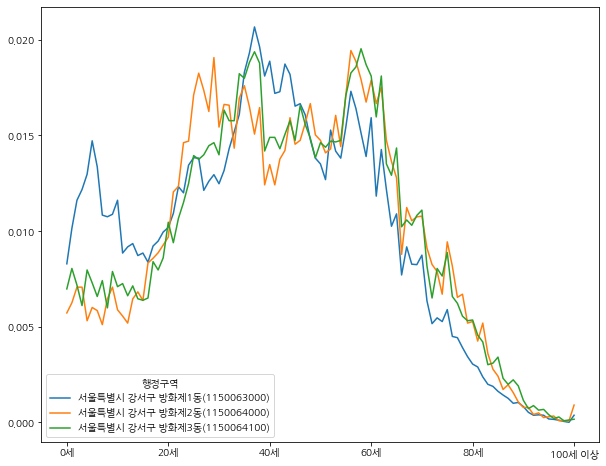

In [195]:
f,ax = plt.subplots(1,1,figsize=(10,8))
df2.T.plot(ax=ax)
plt.show()

#문제 2

Text(0, 0.5, 'Population')

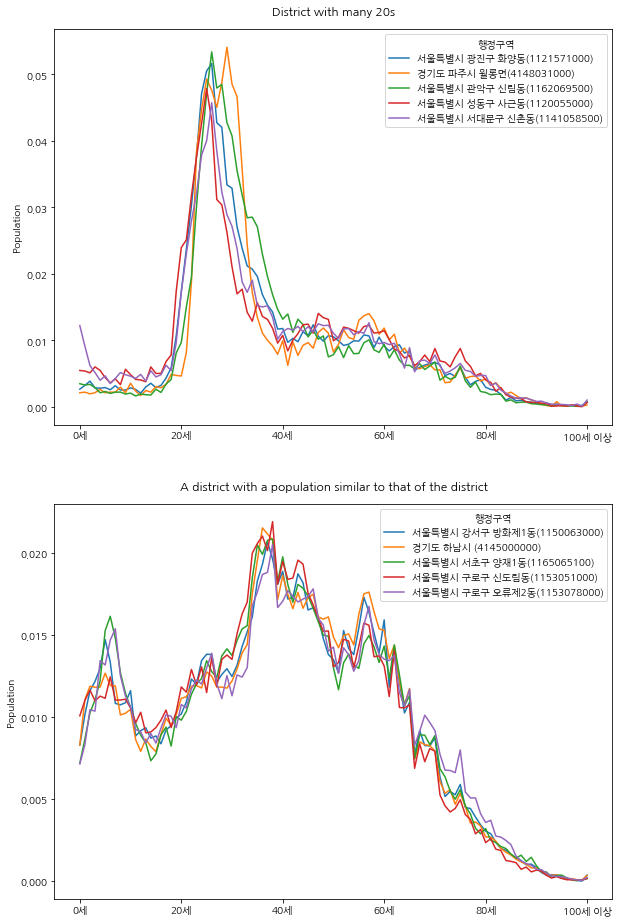

In [196]:
#20대가 가장 많은 지역구 Top5
f,ax = plt.subplots(2,1,figsize=(10,16))
df.loc[df.loc[:,"20세":"29세"].sum(axis=1).sort_values(ascending=False).index[:5]].T.plot(ax=ax[0])
ax[0].set_title('District with many 20s',y=1.02)
ax[0].set_ylabel('Population') 
#외전으로 우리 동네랑 인구수 비슷한 곳 찾아보기
df.loc[np.power(df.sub(df2.iloc[0], axis=1), 2).sum(axis=1).sort_values().index[:5]].T.plot(ax=ax[1])
ax[1].set_title('A district with a population similar to that of the district',y=1.02)
ax[1].set_ylabel('Population') 

#문제 3

(-0.005, 0.1)

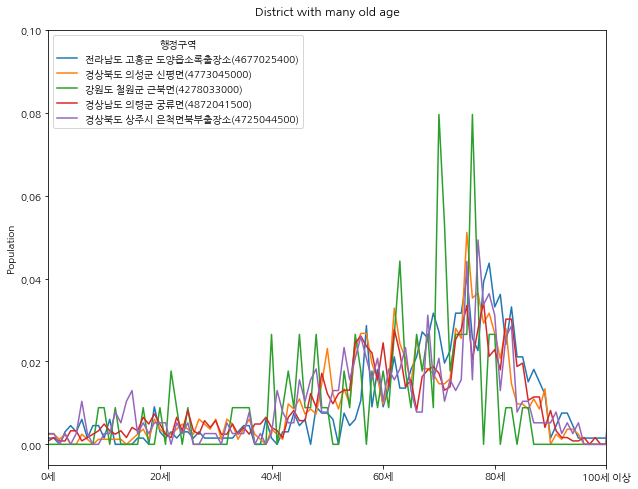

In [206]:
f,ax = plt.subplots(1,1,figsize=(10,8))
df.loc[df.loc[:,'70세':].sum(axis=1).sort_values(ascending=False).index[:5]].T.plot(ax=ax)
ax.set_title('District with many old age',y=1.02)
ax.set_ylabel('Population') 
ax.set_xlim([0,100])
ax.set_ylim([-0.005,0.1])

In [198]:
for i in range(1,10):
  df[str(i)+'0대'] = df.loc[:,str(i)+'0세':str(i)+'9세'].sum(axis=1) 

In [199]:
df

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,38세,39세,...,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상,10대,20대,30대,40대,50대,60대,70대,80대,90대
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.006214,0.007155,0.007540,0.007353,0.007272,0.008008,0.007648,0.007703,0.007281,0.007726,0.008174,0.007558,0.007343,0.008142,0.008428,0.008500,0.009468,0.011015,0.010687,0.011444,0.012271,0.012745,0.013668,0.014601,0.015158,0.016216,0.016389,0.015318,0.015173,0.015266,0.014869,0.015016,0.015302,0.015149,0.016622,0.017560,0.017564,0.017163,0.016773,0.014184,...,0.009190,0.007424,0.006521,0.006587,0.006443,0.007598,0.006089,0.005160,0.005058,0.004378,0.003915,0.003487,0.003217,0.002659,0.002207,0.001948,0.001560,0.001371,0.001238,0.001031,0.000832,0.000598,0.000476,0.000364,0.000355,0.000261,0.000188,0.000146,0.000102,0.000075,0.000560,0.090760,0.146805,0.160203,0.167182,0.157601,0.112509,0.064450,0.022634,0.003396
서울특별시 종로구 (1111000000),0.004213,0.005130,0.005886,0.005783,0.005550,0.006758,0.005873,0.006539,0.005938,0.006500,0.007036,0.006713,0.006513,0.007172,0.007540,0.007805,0.008878,0.010067,0.009957,0.012173,0.013885,0.013749,0.014777,0.015404,0.016644,0.017032,0.017264,0.016030,0.014887,0.014796,0.014137,0.013769,0.013872,0.012955,0.014156,0.014079,0.015068,0.014337,0.014389,0.011721,...,0.010454,0.008264,0.007760,0.007792,0.008251,0.009621,0.008180,0.007069,0.007017,0.005964,0.005027,0.005033,0.004484,0.003722,0.003185,0.002720,0.002507,0.001951,0.001680,0.001493,0.001208,0.000963,0.000743,0.000614,0.000510,0.000523,0.000388,0.000297,0.000239,0.000168,0.001460,0.083853,0.154468,0.138483,0.161995,0.167067,0.116676,0.080371,0.031802,0.005654
서울특별시 종로구 청운효자동(1111051500),0.006103,0.006178,0.006781,0.007911,0.007309,0.008740,0.008816,0.008740,0.007685,0.008966,0.010850,0.009268,0.008137,0.010172,0.009494,0.010473,0.010398,0.012960,0.012884,0.012357,0.012131,0.014542,0.012658,0.011980,0.012734,0.012884,0.013487,0.011603,0.011377,0.014391,0.011076,0.013412,0.014316,0.012658,0.012658,0.014843,0.018309,0.016275,0.017480,0.014316,...,0.009569,0.008363,0.007836,0.007384,0.007987,0.009117,0.007459,0.006857,0.007836,0.006254,0.005576,0.005726,0.004370,0.004144,0.003843,0.002260,0.002260,0.000980,0.001808,0.001356,0.000904,0.000904,0.001055,0.000527,0.000527,0.000603,0.000226,0.000377,0.000075,0.000075,0.001281,0.106992,0.127788,0.145344,0.179400,0.150090,0.095615,0.078662,0.032324,0.005274
서울특별시 종로구 사직동(1111053000),0.004555,0.006673,0.007944,0.007203,0.008050,0.008580,0.007838,0.008791,0.006991,0.009215,0.007309,0.008156,0.006037,0.006885,0.008686,0.006779,0.008897,0.008580,0.009957,0.009427,0.009957,0.009533,0.009745,0.011545,0.011651,0.012922,0.014723,0.011969,0.011651,0.014405,0.014935,0.014405,0.013664,0.014405,0.016630,0.013982,0.018112,0.016100,0.014935,0.013346,...,0.010062,0.008050,0.008156,0.007626,0.007203,0.008897,0.009533,0.008580,0.006885,0.006567,0.006567,0.005826,0.006885,0.005296,0.003495,0.002754,0.002330,0.002860,0.002754,0.001801,0.001589,0.001165,0.001377,0.000741,0.000530,0.000741,0.000318,0.000636,0.000424,0.000424,0.001801,0.080712,0.118102,0.150514,0.171274,0.158987,0.112700,0.081559,0.040568,0.007944
서울특별시 종로구 삼청동(1111054000),0.004128,0.001376,0.007568,0.004472,0.004128,0.004472,0.006880,0.003784,0.007224,0.007224,0.008256,0.007224,0.006536,0.005504,0.007224,0.006536,0.008944,0.009288,0.009976,0.009632,0.013760,0.008944,0.012728,0.014448,0.013072,0.012728,0.009976,0.012384,0.010664,0.016168,0.009976,0.011696,0.012384,0.012040,0.012384,0.016168,0.017544,0.016168,0.017200,0.013760,...,0.014104,0.009976,0.007912,0.012384,0.006536,0.014448,0.010320,0.011352,0.006880,0.006880,0.005848,0.007568,0.005848,0.004472,0.004816,0.005504,0.004472,0.002752,0.002752,0.002064,0.001720,0.001720,0.000688,0.0010

In [211]:
old = df.loc[df.loc[:,'70세':].sum(axis=1).sort_values(ascending=False).index[:5]]

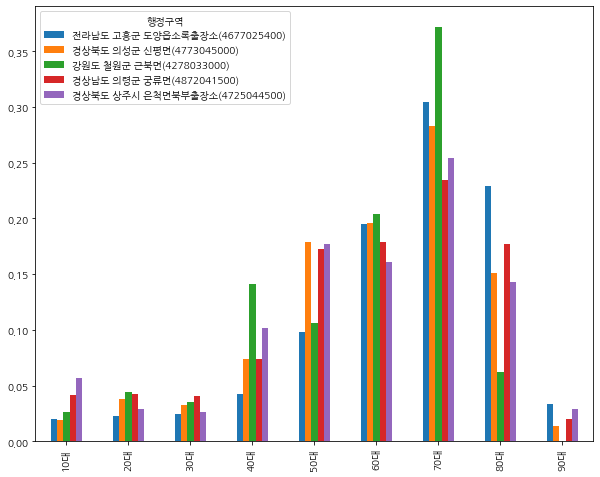

In [217]:
f,ax = plt.subplots(1,1,figsize=(10,8))
old.loc[:,'10대':'90대'].transpose().plot.bar(ax=ax)